Authors:

*   Adam Davidson
*   Hen Poretzky
*   Sagiv Tura

In [ ]:
# General imports
!pip install openml
#!pip install preamble
%matplotlib inline
import pandas as pd
import openml as oml
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVR
from tqdm.notebook import tqdm as tqdm
from sklearn.preprocessing import LabelEncoder

# Exercise 1 - Business Understanding
# Exercise 1.1
Read your dataset into dataframe using Pandas library.

In [ ]:
dataset = oml.datasets.get_dataset(185)
datasetFP = dataset
# Get the pandas dataframe (default)
X, y, _, attribute_names = dataset.get_data(target=dataset.default_target_attribute)
attribute_names = list(X)
target = y

In [ ]:
X.head(5)

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position
0,23,3298,12364,2174,3771,624,98,755,2297,1402,1383.0,0.305,0.377,0.555,0.980,Outfield
1,13,1165,4019,378,1022,163,19,57,366,208,499.0,0.254,0.294,0.347,0.985,Second_base
2,13,1424,5557,844,1588,249,48,9,394,453,223.0,0.286,0.343,0.353,0.974,Second_base
3,14,1281,4019,591,1082,188,49,37,303,414,447.0,0.269,0.340,0.368,0.955,Third_base
4,17,1959,6606,823,1832,295,35,336,1122,594,1059.0,0.277,0.339,0.485,0.994,First_base


In [ ]:
attribute_names

['Number_seasons',
 'Games_played',
 'At_bats',
 'Runs',
 'Hits',
 'Doubles',
 'Triples',
 'Home_runs',
 'RBIs',
 'Walks',
 'Strikeouts',
 'Batting_average',
 'On_base_pct',
 'Slugging_pct',
 'Fielding_ave',
 'Position']

In [ ]:
df = X[['Number_seasons',
 'Games_played',
 'At_bats',
 'Runs',
 'Hits',
 'Doubles',
 'Triples',
 'Home_runs',
 'RBIs',
 'Walks',
 'Strikeouts',
 'Batting_average',
 'On_base_pct',
 'Slugging_pct',
 'Fielding_ave',
 'Position']
].copy()
df.head()

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position
0,23,3298,12364,2174,3771,624,98,755,2297,1402,1383.0,0.305,0.377,0.555,0.980,Outfield
1,13,1165,4019,378,1022,163,19,57,366,208,499.0,0.254,0.294,0.347,0.985,Second_base
2,13,1424,5557,844,1588,249,48,9,394,453,223.0,0.286,0.343,0.353,0.974,Second_base
3,14,1281,4019,591,1082,188,49,37,303,414,447.0,0.269,0.340,0.368,0.955,Third_base
4,17,1959,6606,823,1832,295,35,336,1122,594,1059.0,0.277,0.339,0.485,0.994,First_base


In [ ]:
df["Position"].value_counts()

Outfield             492
Catcher              254
Shortstop            154
Second_base          148
Third_base           145
First_base           139
Designated_hitter      8
Name: Position, dtype: int64

<Axes: title={'center': 'Position'}>

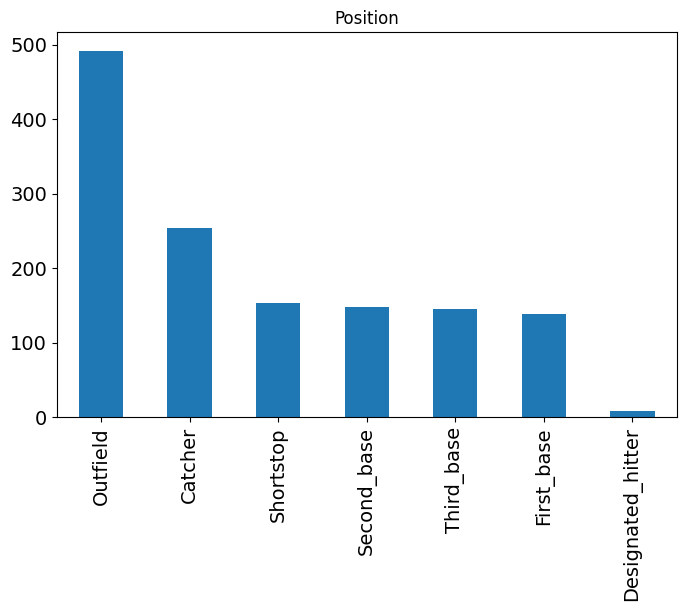

In [ ]:
df["Position"].value_counts().plot(kind="bar", title="Position", fontsize=14, figsize=(8,5))

In [ ]:
AVG_Seasons = df["Number_seasons"].mean()
AVG_Seasons

13.485820895522387

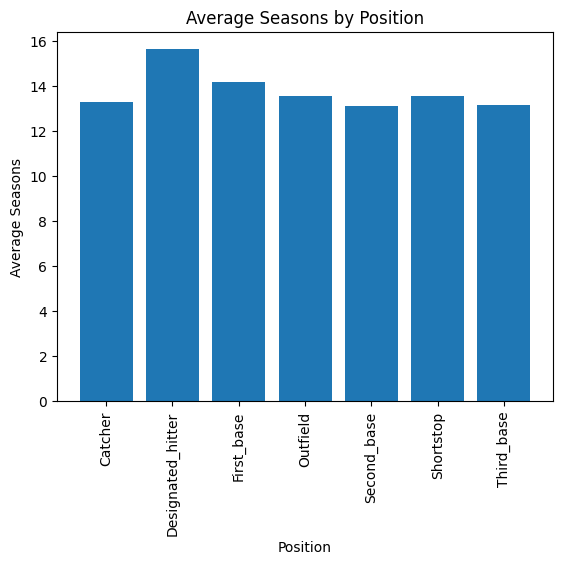

In [ ]:
Season_position = df.groupby("Position")["Number_seasons"].mean()
plt.bar(Season_position.index, Season_position.values)
plt.xlabel("Position")
plt.ylabel("Average Seasons")
plt.title("Average Seasons by Position")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.isnull().sum()


Number_seasons      0
Games_played        0
At_bats             0
Runs                0
Hits                0
Doubles             0
Triples             0
Home_runs           0
RBIs                0
Walks               0
Strikeouts         20
Batting_average     0
On_base_pct         0
Slugging_pct        0
Fielding_ave        0
Position            0
dtype: int64

In [ ]:
df.drop(columns=["Strikeouts"], inplace=True)


In [ ]:
df

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position
0,23,3298,12364,2174,3771,624,98,755,2297,1402,0.305,0.377,0.555,0.980,Outfield
1,13,1165,4019,378,1022,163,19,57,366,208,0.254,0.294,0.347,0.985,Second_base
2,13,1424,5557,844,1588,249,48,9,394,453,0.286,0.343,0.353,0.974,Second_base
3,14,1281,4019,591,1082,188,49,37,303,414,0.269,0.340,0.368,0.955,Third_base
4,17,1959,6606,823,1832,295,35,336,1122,594,0.277,0.339,0.485,0.994,First_base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,11,1234,4131,572,1093,159,22,237,776,383,0.265,0.331,0.486,0.968,Outfield
1336,19,1280,4546,617,1224,222,76,26,620,390,0.269,0.339,0.369,0.952,Catcher
1337,12,1095,3283,353,773,130,22,91,352,246,0.235,0.291,0.372,0.941,Third_base
1338,13,1456,5304,695,1566,275,105,58,796,242,0.295,0.331,0.419,0.928,Third_base


# Exercise 1.2
Write a short paragraph about the main business goal of this project.

The business goal is to predict players that will be inducted into the baseball hall of fame using their career statistics.
We will use feature selection methods to identify features that are relevant and have strong correlation to our goal

# Exercise 2 - Feature Importance

# Exercise 2.1
Write the function get_top_features(X, y, threshold). The function gets as an input your features (X), the target variable (y), and a threshold. The function returns the features whose importance is above the threshold.

In [ ]:
for col in df:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position
0,13,978,1237,810,996,410,98,290,794,693,103,128,263,107,3
1,3,402,535,210,390,138,19,57,238,135,52,45,89,112,4
2,3,581,873,547,698,223,48,9,265,358,84,94,95,101,4
3,4,476,535,378,423,163,49,37,182,321,67,91,110,82,6
4,7,832,1025,534,786,266,35,251,689,463,75,90,225,121,2


In [ ]:
X = df[['Number_seasons',
 'Games_played',
 'At_bats',
 'Runs',
 'Hits',
 'Doubles',
 'Triples',
 'Home_runs',
 'RBIs',
 'Walks',
 'Batting_average',
 'On_base_pct',
 'Slugging_pct',
 'Fielding_ave',
 'Position']]

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
def get_top_features(X, y, threshold):
    # Train a random forest classifier
    clf = RandomForestClassifier()
    clf.fit(X, y)

    # Get feature importances
    importances = clf.feature_importances_

    # Select features above the threshold
    selected_features = np.array(X.columns)[importances > threshold]

    return selected_features

# Exercise 2.2
Explore your dataset over the thresholds = [0.05, 0.1, 0.15, ..., 0.95]. For each subset of features, train a supervised model and store the accuracy score.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

accuracy_scores = []

# Iterate over the range of thresholds
for threshold in np.arange(0.05, 1.0, 0.05):
    # Get the selected features based on the threshold
    selected_features = get_top_features(X, y, threshold)
    if len(selected_features) == 0:
      break

    # Filter the dataset to include only the selected features
    X_selected = X[selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train an SVM model
    svm_model = SVC()
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate the accuracy score and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Print the threshold and corresponding accuracy score
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.4f}")

# Print all the accuracy scores together
print("Accuracy scores:", accuracy_scores)

Threshold: 0.05, Accuracy: 0.9366
Threshold: 0.10, Accuracy: 0.9291
Accuracy scores: [0.9365671641791045, 0.9291044776119403]


# Exercise 2.3
Choose threshold from 2.2 and select the top importance features.

In [ ]:
threshold = 0.05
get_top_features(X, y, threshold)

array(['Games_played', 'At_bats', 'Runs', 'Hits', 'Doubles', 'Triples',
       'Home_runs', 'RBIs', 'Batting_average', 'On_base_pct',
       'Slugging_pct'], dtype=object)

# Exercise 3 - Dimensionality Reduction
Compare the three algorithms of Dimensionality Reduction we have learned in class on your dataset. What is the best algorithm for you?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sn
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from pandas.plotting import scatter_matrix
from sklearn import datasets
plt.style.use("bmh")

In [ ]:
def plot_PCA(data, labels):
    pca = decomposition.PCA(n_components = 2) # n_components = to which dimension should I compress the data????
    pca_data = pca.fit_transform(data)
    pca_data = np.vstack((pca_data.T, labels)).T
    df = pd.DataFrame(data=pca_data, columns=("dim1", "dim2", "Label"))
    sn.FacetGrid(df, hue="Label", height=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("PCA")
    plt.show()

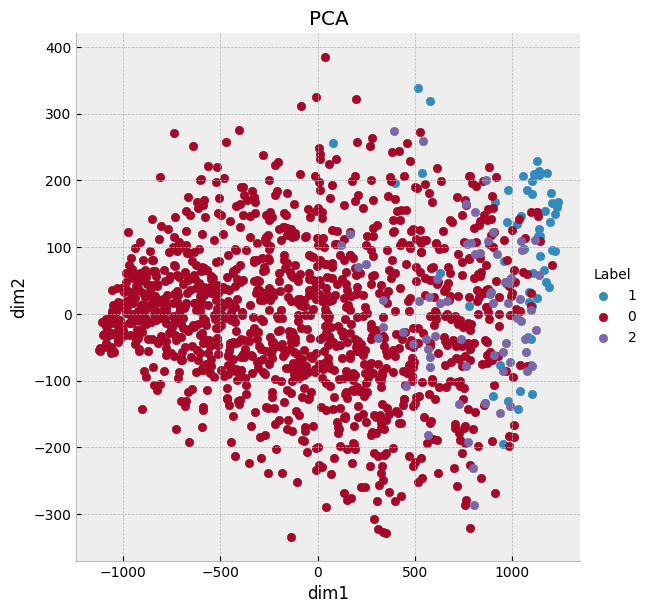

In [ ]:
plot_PCA(X,y)

In [ ]:
def plot_tSNE(data, labels, perplexity=[5,20,30,50]):
    kl_divergence_iris = []
    fig, ax = plt.subplots(1, 4, figsize=(40, 8))
    for idx, p in enumerate(perplexity):
        tsne = TSNE(n_components=2, random_state=0, perplexity=p)
        tsne_data = tsne.fit_transform(data)
        kl_divergence_iris.append(tsne.kl_divergence_)
        tsne_data = np.vstack((tsne_data.T, labels)).T
        df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "Label"))
        sn.scatterplot(x=df['dim1'], y=df['dim2'], hue=df["Label"], ax=ax[idx], s=100,palette='colorblind').set_title("t-SNE with perplexity="+str(p))
    plt.show()

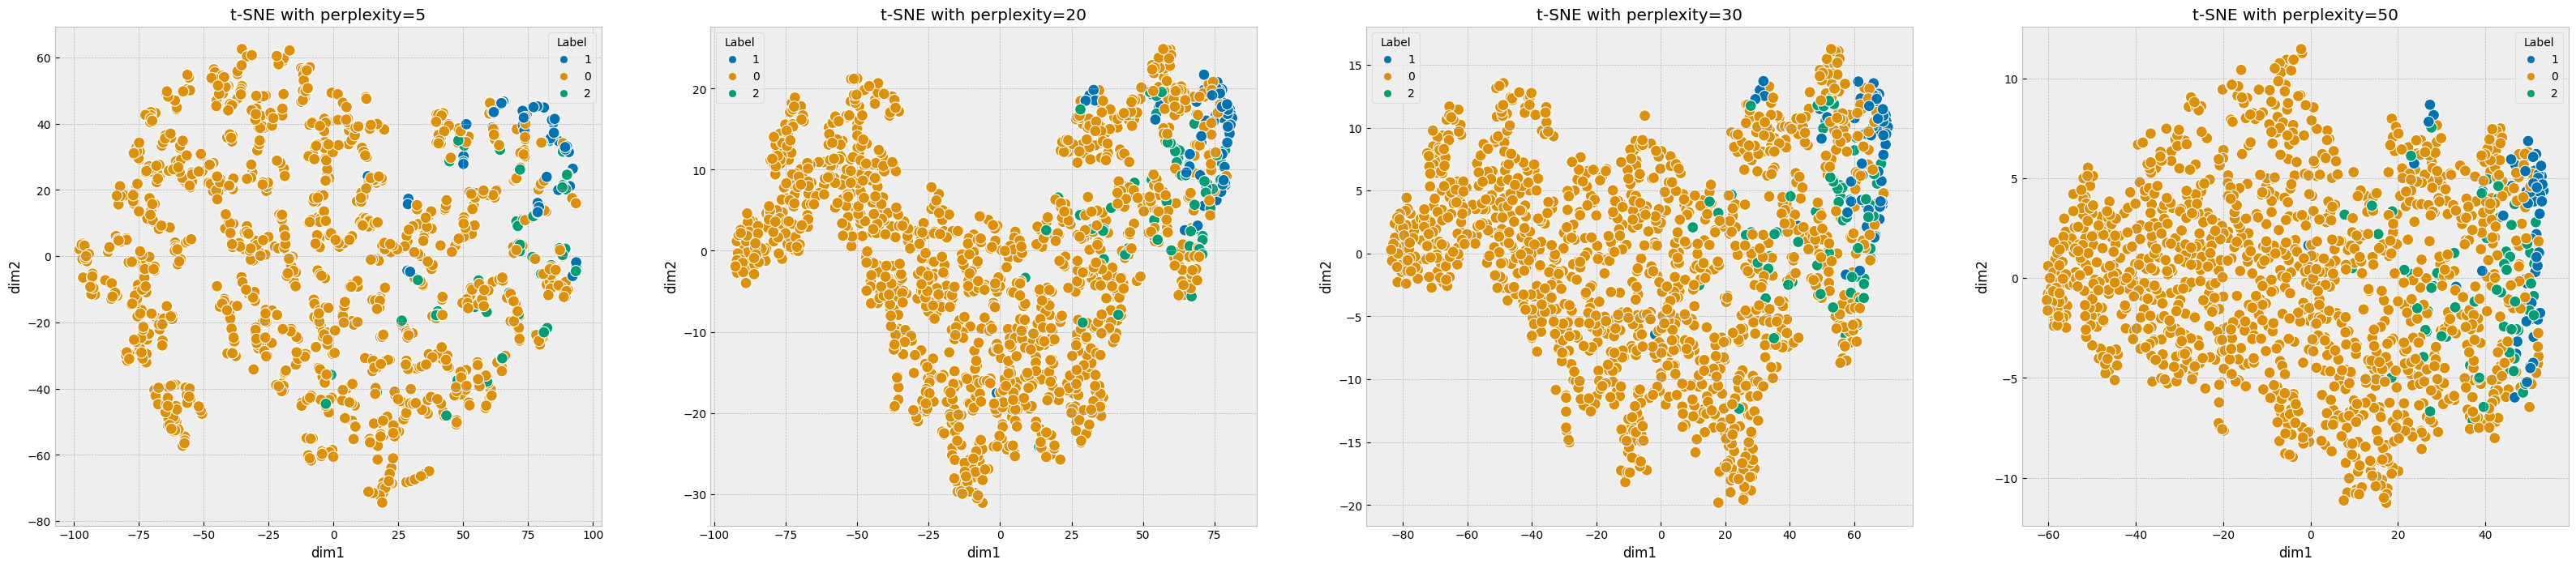

In [ ]:
plot_tSNE(X,y)

In [ ]:
def plot_MDS(data, labels):
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data)
    mds_data_iris = np.vstack((mds_data.T, labels)).T
    df = pd.DataFrame(data=mds_data_iris, columns=("dim1", "dim2", "Label"))
    sn.FacetGrid(df, hue="Label", height=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("MDS with final stress=" + str(mds.stress_))
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


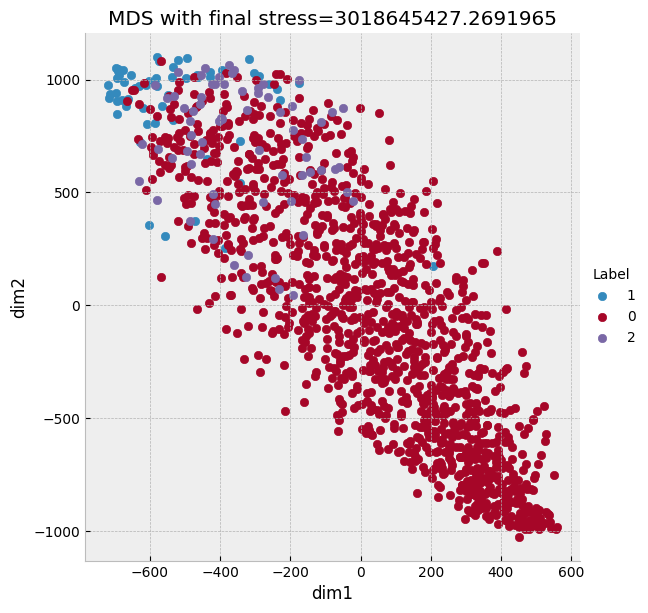

In [ ]:
plot_MDS(X, y)

After evaluating the three results, we chose (tSNE) as the best suited algorithm. We think that it shows the best separation of data, where the vast majority of points do not overlap

# Exercise 4 - Outliers Detection

# Exercise 4.1
Choose the top three features of your dataset and perform one outliers detection algorithm.

In [ ]:
selected_features = get_top_features(X, y, 0.1)
X_selected = X[selected_features]
X_selected

,Runs,Hits,Batting_average
0,810,996,103
1,210,390,52
2,547,698,84
3,378,423,67
4,534,786,75
...,...,...,...
1335,362,428,63
1336,396,499,67
1337,192,250,33
1338,449,690,93


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import svm
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_circles


In [ ]:
clf = IsolationForest(max_samples='auto', random_state = 1)
preds = clf.fit_predict(X_selected)
df['isoletionForest_outliers'] = preds
df['isoletionForest_outliers'] = df['isoletionForest_outliers'].astype(str)
df['isoletionForest_scores'] = clf.decision_function(X_selected)
df

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,isoletionForest_outliers,isoletionForest_scores
0,13,978,1237,810,996,410,98,290,794,693,103,128,263,107,3,-1,-0.082807
1,3,402,535,210,390,138,19,57,238,135,52,45,89,112,4,1,0.049386
2,3,581,873,547,698,223,48,9,265,358,84,94,95,101,4,1,0.057537
3,4,476,535,378,423,163,49,37,182,321,67,91,110,82,6,1,0.073238
4,7,832,1025,534,786,266,35,251,689,463,75,90,225,121,2,1,0.038647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1,447,558,362,428,134,22,210,547,296,63,82,226,95,3,1,0.077235
1336,9,475,664,396,499,197,76,26,447,302,67,90,111,79,0,1,0.077211
1337,2,350,367,192,250,105,22,91,226,171,33,42,114,68,6,1,0.021254
1338,3,598,825,449,690,248,104,58,560,167,93,82,161,55,6,1,0.035171


In [ ]:
df['isoletionForest_outliers'].value_counts()

1     983
-1    357
Name: isoletionForest_outliers, dtype: int64

<Axes: xlabel='Runs', ylabel='Hits'>

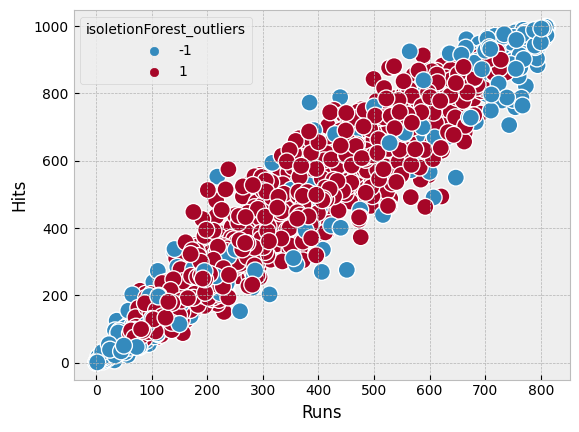

In [ ]:
sns.scatterplot(data=df, x="Runs", y="Hits", hue="isoletionForest_outliers", s=150)

<Axes: xlabel='Runs', ylabel='Batting_average'>

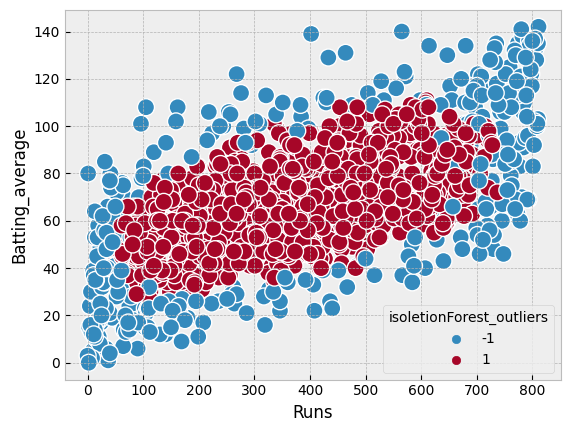

In [ ]:
sns.scatterplot(data=df, x="Runs", y="Batting_average", hue="isoletionForest_outliers", s=150)

<Axes: xlabel='Hits', ylabel='Batting_average'>

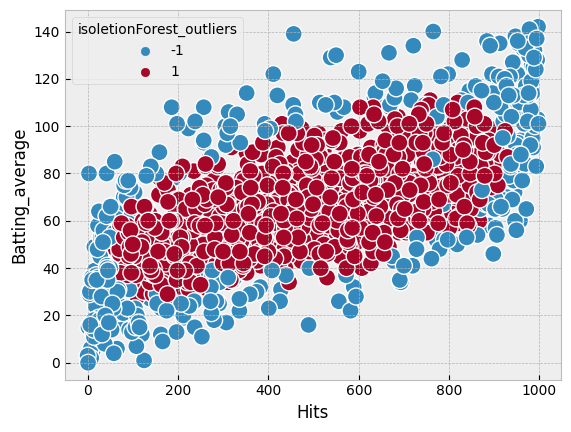

In [ ]:
sns.scatterplot(data=df, x="Hits", y="Batting_average", hue="isoletionForest_outliers", s=150)